In [1]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - CMRS ET

#### Benchmarking dataset information
The actual ET (in mm) dataset consists of catchment-averaged actual evapotranspiration estimates from CMRSET supplied by CSIRO.
<br>
##### Source:
Guerschman, J.P., Van Dijk, A.I.J.M., Mattersdorf, G., Beringer, J., Hutley, L.B., Leuning, R., Pipunic, R.C. and Sherman, B.S., 2009. Scaling of potential evapotranspiration with MODIS data reproduces flux observations and catchment water balance observations across Australia. Journal of Hydrology, 369(1-2): 107-119.

This notebooks goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Catchments to be benchmarked<br>
 2.2 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
7. Statistics plotting<br>

### 1. Import required libraries

In [2]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt
from awrams.utils import config_manager

###2. Set up comparison
Compare CMRS ET aggregated to region of interest<br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1 Catchments to be benchmarked

In [8]:
sys_profile = config_manager.get_system_profile().get_settings()
TRAINING_DATA_PATH = sys_profile['DATA_PATHS']['TRAINING_DATA']

data_path = TRAINING_DATA_PATH + '/benchmarking/'

catchment_csv = data_path+'catchment_ids.csv'
id_list=read_id_csv(catchment_csv)

#### 2.2. Observations to use

In [9]:
obs_csv = data_path+'/cmrset/cmrset.csv'
obs_csv = data_path+'/cmrset/Catchments_ET_CMRS.csv'

### 3.  Create the benchmark object<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [10]:
et = Benchmark("CMRS_ET", "evapotranspiration")

# Specify benchmarking period
et.period = dt.dates("1981", "30/12/2011")

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
et.load(obs_csv, id_list=id_list)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:39: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.monthly = self.obs.data.resample(rule='m', how=self.aggr_how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:40: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.annual = self.obs.data.resample(rule='A', how=self.aggr_how)


In [11]:
et.sites  # Would be nice to have a function to map the catchments selected

['4508',
 '105001',
 '107002',
 '108003',
 '109001',
 '111101',
 '112102',
 '113004',
 '116008']

### 4. Add models to be benchmarked

This step processes the data and calculates all the statistics [can take a while]

In [12]:
# Reading data from pre-processed csv

csv_data = data_path+'/cmrset/awral_etot_avg.csv'
et.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:151: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  _df = cur_data[valid_idx].resample(rule='m', how=np.mean).dropna()
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:152: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  monthly_data = pd.DataFrame(_df,index=_df.index|valid_idx).fillna(method='bfill').resample(rule='m', how=np.sum)[col_name]
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:181: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  out_dct[col] = ts.resample(annual_rule, how)


In [13]:
## Sample code here to extract data on any catchment in the default catchment dataset
## A similar approach would work with a user defined catchment shapefile.

# import pandas as pd
# from awrams.utils import extents
# from awrams.utils.io.data_mapping import SplitFileManager
# from awrams.utils.processing.extract import extract_from_filemanager
# from awrams.utils.gis import ShapefileDB, CATCHMENT_SHAPEFILE

# catchments = ShapefileDB(CATCHMENT_SHAPEFILE)

# var_name = 'qtot_avg'
# model_data_path = '/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_awraprod1/'
# period = dt.dates('jul 2010 - jun 2011')

# pattern = data_path + '/%s*' % var_name
# sfm = SplitFileManager.open_existing(model_data_path,pattern,var_name)
# georef = sfm.get_extent()
# extent_map = {}
    
# for site in q.sites:
#     extent_map[site] = catchments.get_extent_by_field('StationID',site.zfill(6),georef)

# df = extract_from_filemanager(sfm, extent_map, period)
# df

# df.to_csv('./for_streamflow/'+ var_name+ '.csv' 

In [14]:
csv_data = data_path+'/cmrset/AWRAMSI_v5QES_AWRAL_etot_avg_CMRS_ET.csv'
et.add_model("AWRAMSI_v5_0_AWRAL", data_csv=csv_data)

#### 4.1 Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [15]:
et.benchmark.selection

['AWRAMSI_v4_0_AWRAL', 'AWRAMSI_v5_0_AWRAL']

In [39]:
#et.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
et.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

### 5. View the benchmarking statistics tables
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [40]:
et.benchmark.stat_percentiles('grand_f')

,grand_f
AWRAMSI_v5_0_AWRAL,0.298980
AWRAMSI_v4_0_AWRAL,0.270952


In [41]:
et.benchmark.stat_percentiles('nse')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v5_0_AWRAL,-5.162047,-4.319804,-0.327347,0.309657,0.589680,0.755268,0.756441
AWRAMSI_v4_0_AWRAL,-4.459714,-3.574903,-0.459160,0.533537,0.541291,0.629999,0.639714


In [42]:
et.benchmark.stat_percentiles('bias_relative')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v5_0_AWRAL,-0.260659,-0.232667,-0.147821,-0.101505,-0.055168,-0.003524,-0.000305
AWRAMSI_v4_0_AWRAL,-0.240516,-0.232698,-0.109853,-0.089583,-0.040577,-0.035093,-0.034863


In [43]:
et.benchmark.stat_percentiles('pearsons_r')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v5_0_AWRAL,0.650217,0.659570,0.730668,0.825253,0.858632,0.889464,0.898616
AWRAMSI_v4_0_AWRAL,0.644339,0.650187,0.755195,0.840095,0.856408,0.862268,0.862610


### 6. View the statistic plots [regression, cumulative exceedance]

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments

In [44]:
## should there be time series plots first

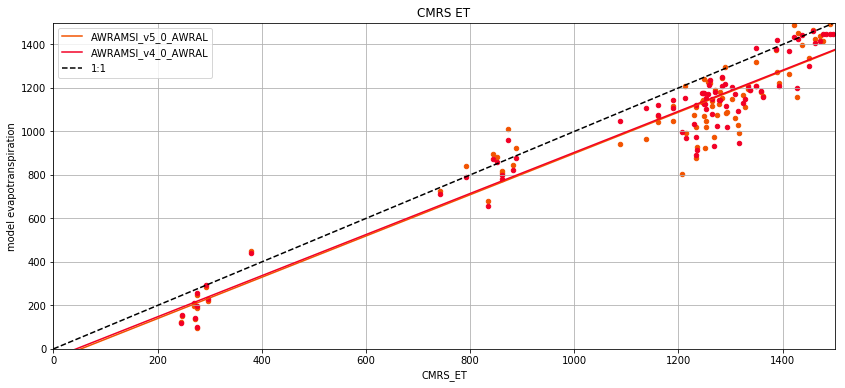

In [45]:
p = et.benchmark.plot_regression(title="CMRS ET", freq='y', xlim=[0,1500], ylim=[0,1500])

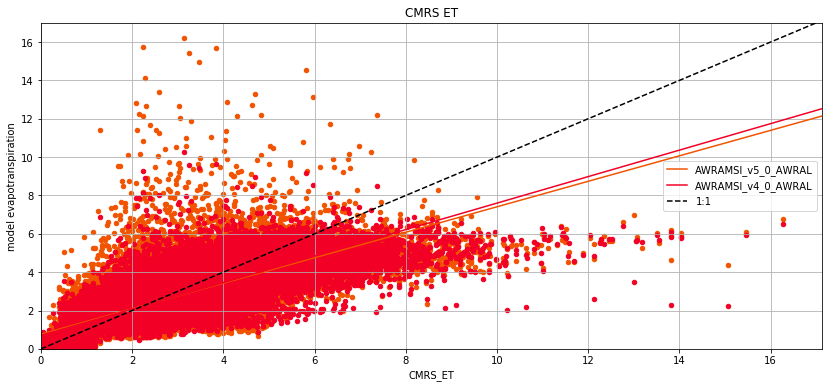

In [46]:
p = et.benchmark.plot_regression(title="CMRS ET", freq='d', xlim=[0,None], ylim=[0,None])

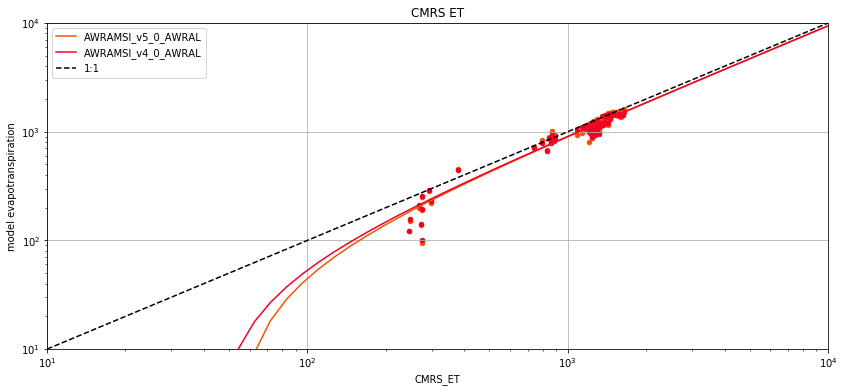

In [47]:
p = et.benchmark.plot_regression(title="CMRS ET", freq='y', yscale='log', xscale='log', ylim=[10,10000], xlim=[10,10000])

###7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

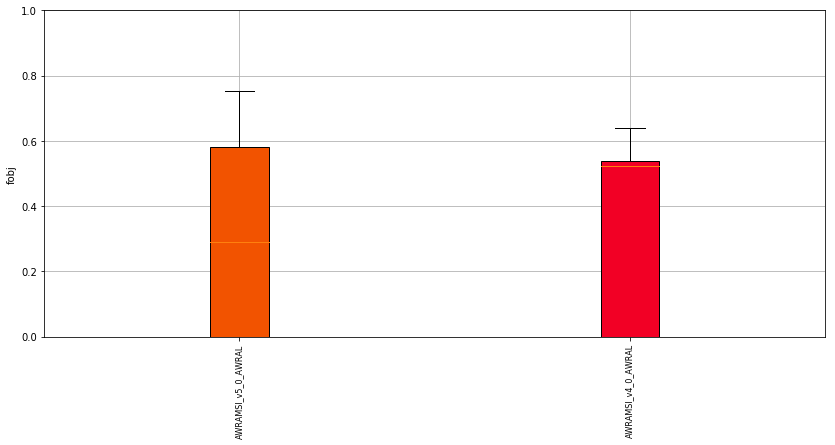

In [48]:
p = et.benchmark.plot_box('fobj', freq='m', ylim=[0,1]) #fobj is viney function used in calibration

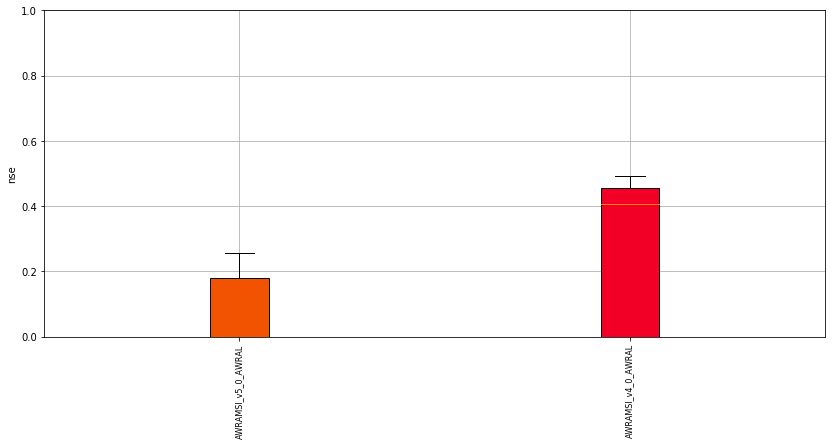

In [49]:
p = et.benchmark.plot_box('nse', freq='d', ylim=[0,1])

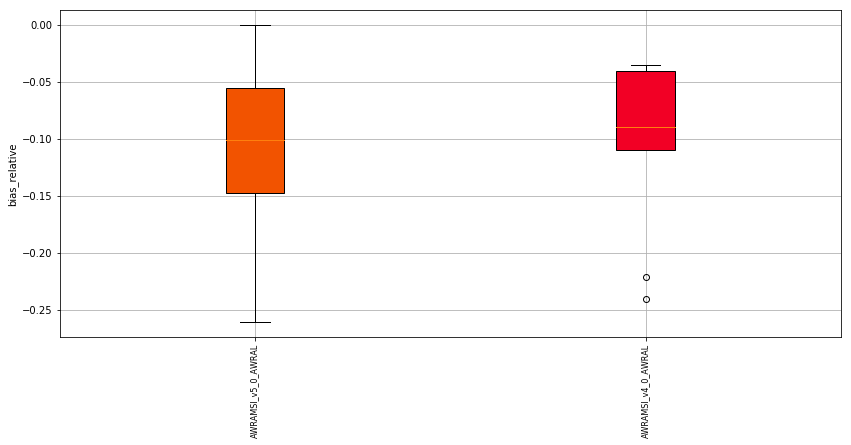

In [50]:
p = et.benchmark.plot_box('bias_relative', freq='m')

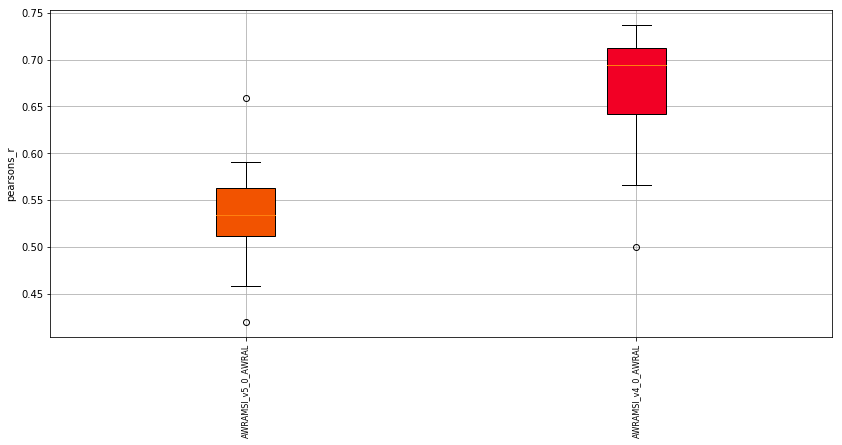

In [51]:
p = et.benchmark.plot_box('pearsons_r', freq='d')

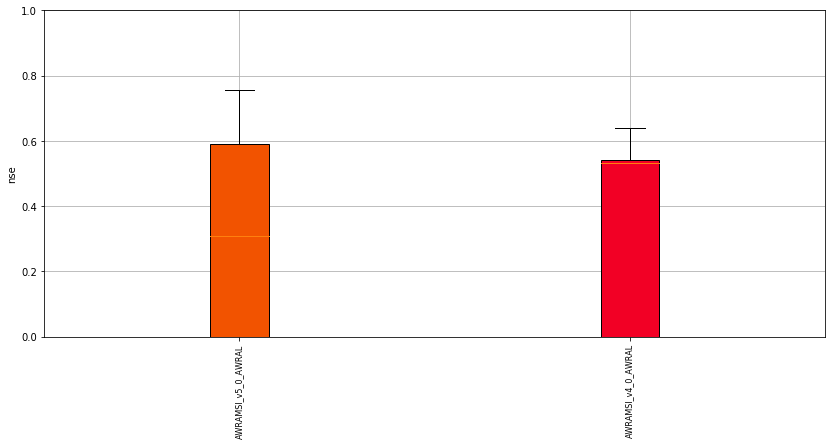

In [52]:
p = et.benchmark.plot_box('nse', freq='m', ylim=[0,1])

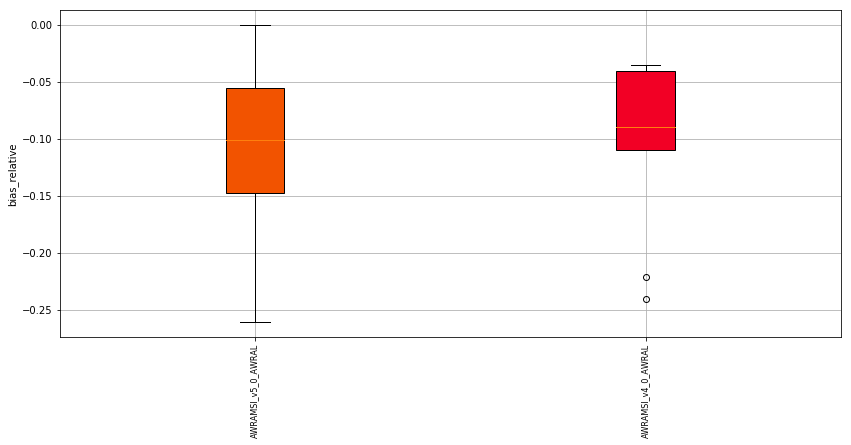

In [53]:
p = et.benchmark.plot_box('bias_relative', freq='m')

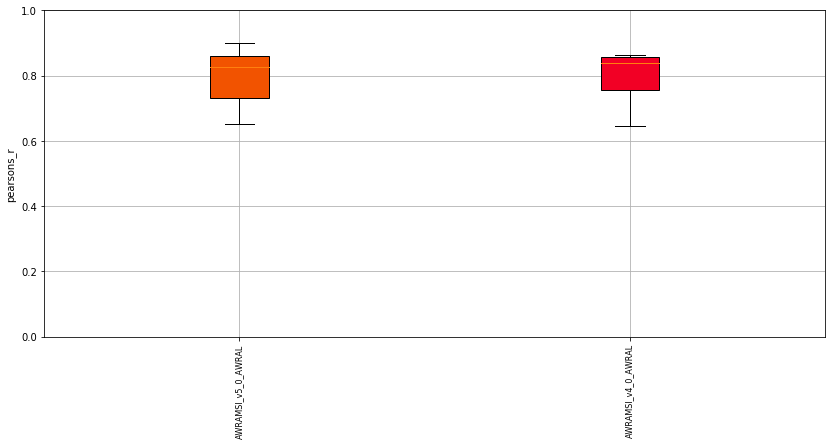

In [54]:
p = et.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])

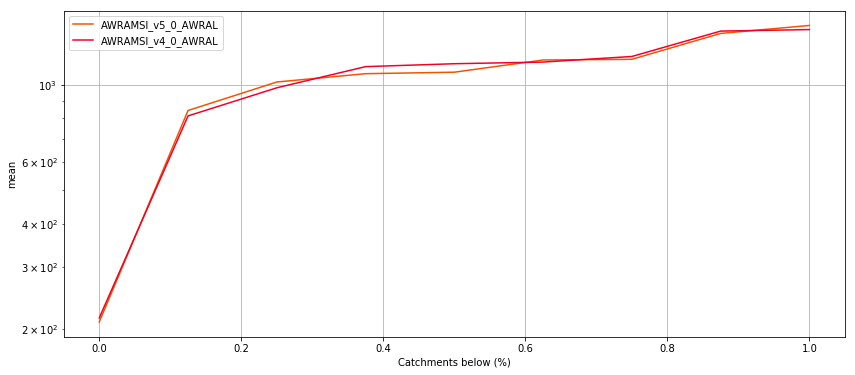

In [55]:
p = et.benchmark.plot_cdf('mean', freq='y', yscale='log')

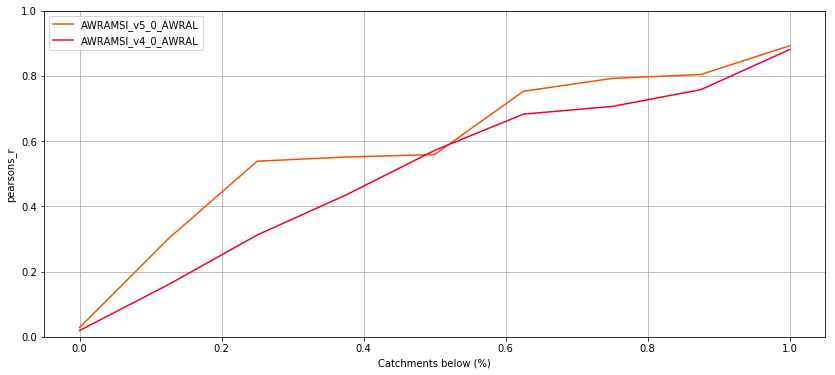

In [56]:
p = et.benchmark.plot_cdf('pearsons_r', freq='y', ylim=[0,1])

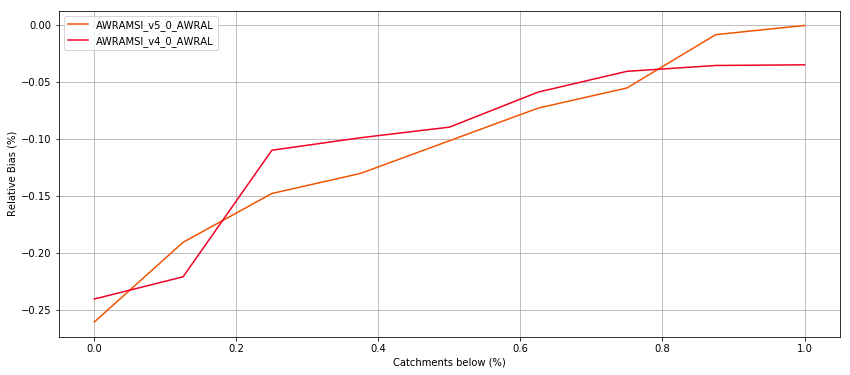

In [57]:
p = et.benchmark.plot_cdf('bias_relative',freq='y', ylabel='Relative Bias (%)')

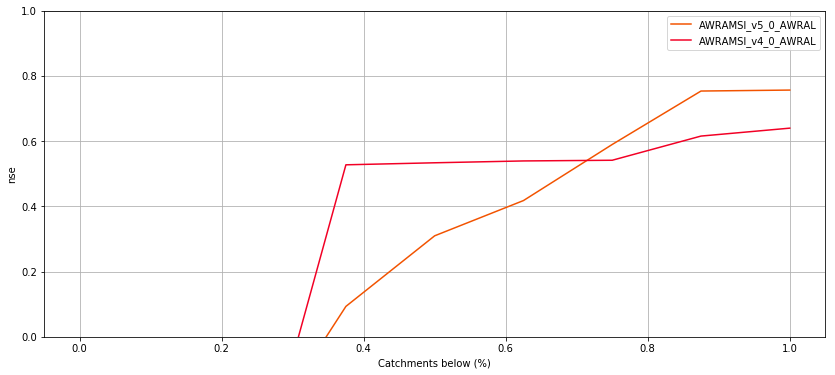

In [58]:
p = et.benchmark.plot_cdf('nse',freq='m', ylim=[0,1])

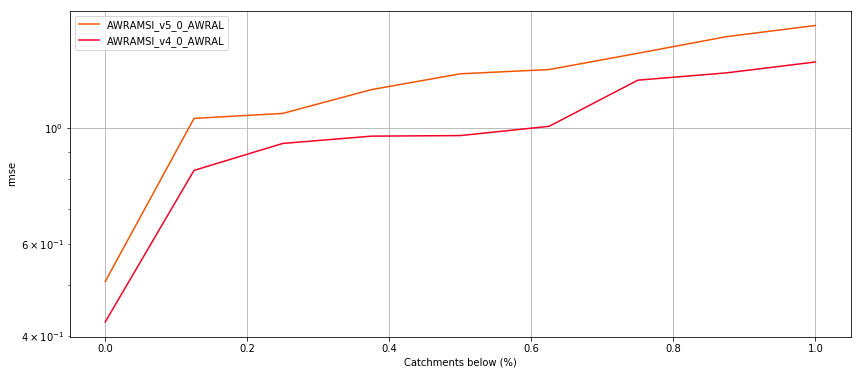

In [59]:
p = et.benchmark.plot_cdf('rmse',freq='d', yscale='log')

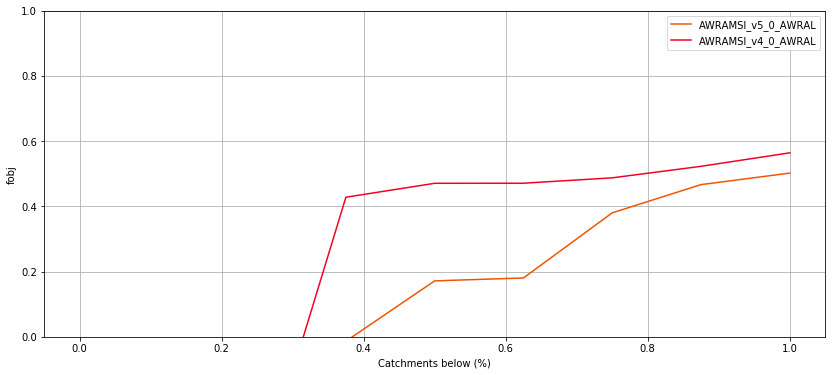

In [60]:
p = et.benchmark.plot_cdf('fobj',freq='d', ylim=[0,1])

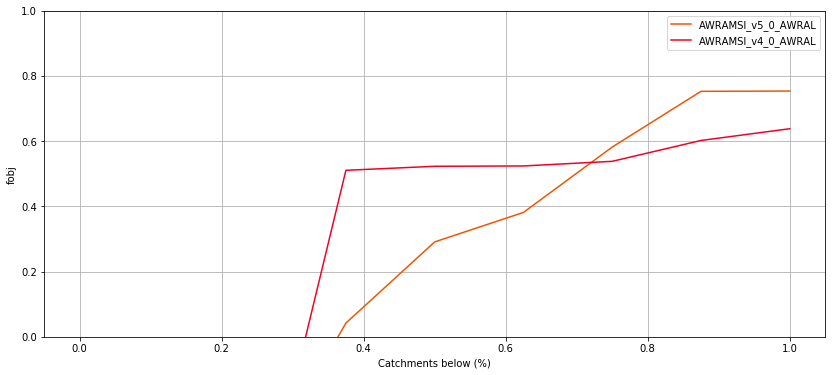

In [61]:
p = et.benchmark.plot_cdf('fobj',freq='m', ylim=[0,1])